In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt_qzvpp=pd.read_pickle('data_def2_qzvpp')
dt_tzvp=pd.read_pickle('data_def2_tzvp')
dt_sto3g=pd.read_pickle("data_sto3G")
dt_sto6g=pd.read_pickle("data_sto6G")
dt_321g=pd.read_pickle("data_321G")
dt_631g=pd.read_pickle("data_631G")
dt_aug=pd.read_pickle("data_aug")
dt_ccpvtz=pd.read_pickle("data_ccpvtz")

In [3]:
def plot_err(ax1,ax2,df,title,target,ref):
    ds0=df.query("alchemy==0 &ref==@ref[0] &target==@target &distance>1.5")
    ds1=df.query("alchemy==0 &ref==@ref[1] &target==@target&distance>1.5")
    ds2=df.query("alchemy==0 &ref==@ref[2] &target==@target&distance>1.5")
    ax1.set_title(title)
    ax2.set_title(title)

    ax1.plot(ds0.distance,ds0.e_ccsd,label='{}@{}'.format(target,target))
    ax1.plot(ds0.distance,ds0.e_at_ref_bs,label='{}@{}'.format(target,ref[0]))
    ax1.plot(ds1.distance,ds1.e_at_ref_bs,label='{}@{}'.format(target,ref[1]))
    ax1.plot(ds2.distance,ds2.e_at_ref_bs,label='{}@{}'.format(target,ref[2]))
    ax2.plot(ds0.distance,ds0.e_at_ref_bs-ds0.e_ccsd,lw=2.5,label='{}@{}'.format(target,ref[0]))
    ax2.plot(ds1.distance,ds1.e_at_ref_bs-ds1.e_ccsd,lw=2.5,label='{}@{}'.format(target,ref[1]))
    ax2.plot(ds2.distance,ds2.e_at_ref_bs-ds2.e_ccsd,lw=2.5,label='{}@{}'.format(target,ref[2]))
    ax2.axhline((ds0.e_at_ref_bs-ds0.e_ccsd).mean(),color='black',ls='--',lw=1)
    ax2.axhline((ds1.e_at_ref_bs-ds1.e_ccsd).mean(),color='black',ls='--',lw=1)
    ax2.axhline((ds2.e_at_ref_bs-ds2.e_ccsd).mean(),color='black',ls='--',lw=1)
    ax1.legend()
    ax2.legend()

In [4]:
def plot_curve(ax,df,title,target,ref):
    ds0=df.query("alchemy==0 &ref==@ref[0] &target==@target")
    ds1=df.query("alchemy==0 &ref==@ref[1] &target==@target")
    ds2=df.query("alchemy==0 &ref==@ref[2] &target==@target")
    ax.set_title("Dissociation curve of {}".format(target))
    ax.set_xlim(1.3,3.2)
    ax.plot(ds0.distance,ds0.e_ccsd,label='with {} Basis Set'.format(target))
    ax.plot(ds0.distance,ds0.e_at_ref_bs,label='with {} Basis Set'.format(ref[0]))
    ax.plot(ds1.distance,ds1.e_at_ref_bs,label='with {} Basis Set'.format(ref[1]))
    ax.plot(ds2.distance,ds2.e_at_ref_bs,label='with {} Basis Set'.format(ref[2]))
    ax.legend()


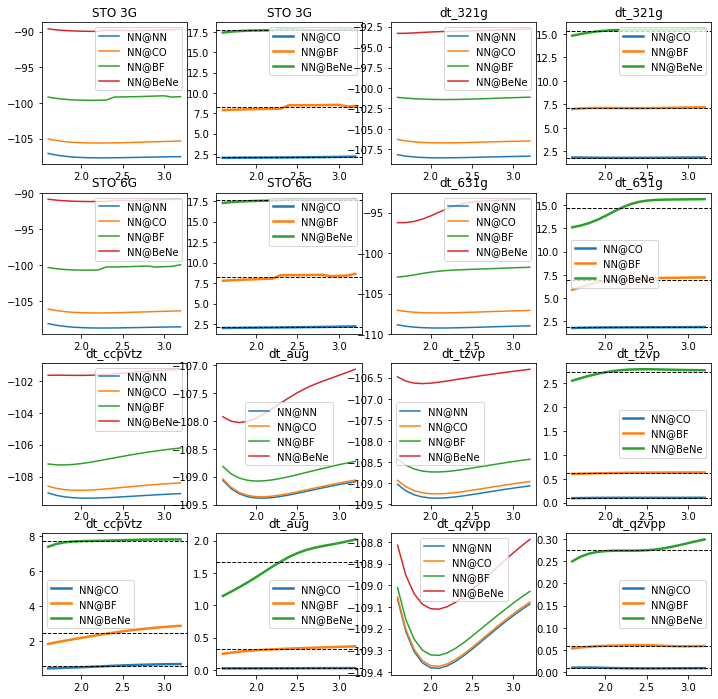

In [5]:
fig,axs=plt.subplots(4,4,figsize=(12,12))
plot_err(axs[0,0],axs[0,1],dt_sto3g,"STO 3G",'NN',['CO','BF','BeNe'])
plot_err(axs[1,0],axs[1,1],dt_sto6g,"STO 6G",'NN',['CO','BF','BeNe'])
plot_err(axs[0,2],axs[0,3],dt_321g,"dt_321g",'NN',['CO','BF','BeNe'])
plot_err(axs[1,2],axs[1,3],dt_631g,"dt_631g",'NN',['CO','BF','BeNe'])
plot_err(axs[2,0],axs[3,0],dt_ccpvtz,"dt_ccpvtz",'NN',['CO','BF','BeNe'])
plot_err(axs[2,1],axs[3,1],dt_aug,"dt_aug",'NN',['CO','BF','BeNe'])
plot_err(axs[2,2],axs[2,3],dt_tzvp,"dt_tzvp",'NN',['CO','BF','BeNe'])
plot_err(axs[3,2],axs[3,3],dt_qzvpp,"dt_qzvpp",'NN',['CO','BF','BeNe'])

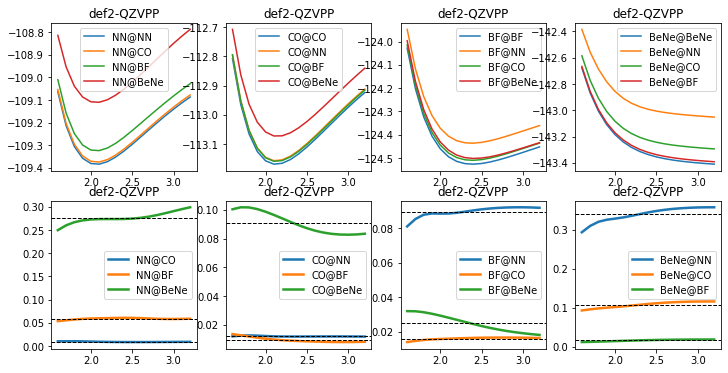

In [6]:
fig,axs=plt.subplots(2,4,figsize=(12,6))
plot_err(axs[0,0],axs[1,0],dt_qzvpp,"def2-QZVPP",'NN',['CO','BF','BeNe'])
plot_err(axs[0,1],axs[1,1],dt_qzvpp,"def2-QZVPP",'CO',['NN','BF','BeNe'])
plot_err(axs[0,2],axs[1,2],dt_qzvpp,"def2-QZVPP",'BF',['NN','CO','BeNe'])
plot_err(axs[0,3],axs[1,3],dt_qzvpp,"def2-QZVPP",'BeNe',['NN','CO','BF'])

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the 

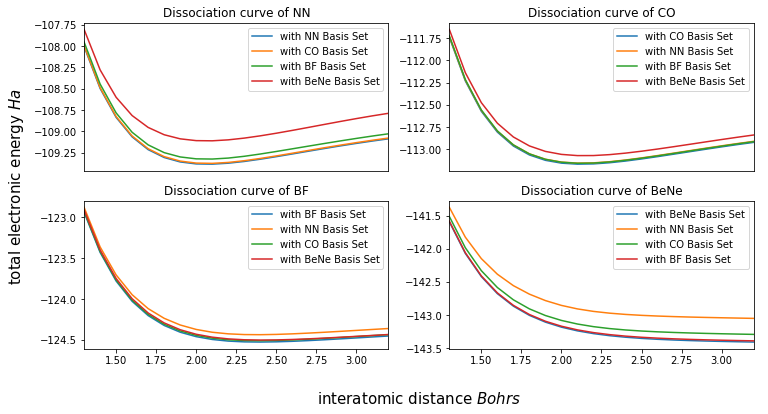

In [7]:
###    FOR def2-QZVPP

fig= plt.figure(figsize=(12,6),frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_xlabel("interatomic distance $Bohrs$ ",fontsize=15,labelpad=25)
plt.axes().set_ylabel("total electronic energy $Ha $",fontsize=15,labelpad=35)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_frame_on(False)

axs=fig.subplots(2,2,sharex=True)
plot_curve(axs[0,0],dt_qzvpp,"def2-QZVPP",'NN',['CO','BF','BeNe'])
axs[0,0].tick_params(bottom=False)
plot_curve(axs[0,1],dt_qzvpp,"def2-QZVPP",'CO',['NN','BF','BeNe'])
axs[0,1].tick_params(bottom=False)
plot_curve(axs[1,0],dt_qzvpp,"def2-QZVPP",'BF',['NN','CO','BeNe'])
plot_curve(axs[1,1],dt_qzvpp,"def2-QZVPP",'BeNe',['NN','CO','BF'])
#plt.savefig("Dissociation")

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as 

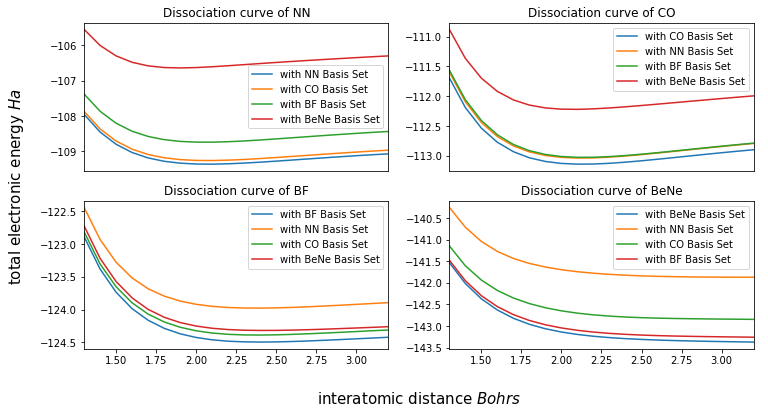

In [8]:
###    FOR def2-TZVP 
fig= plt.figure(figsize=(12,6),frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_xlabel("interatomic distance $Bohrs$ ",fontsize=15,labelpad=25)
plt.axes().set_ylabel("total electronic energy $Ha $",fontsize=15,labelpad=35)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_frame_on(False)

axs=fig.subplots(2,2,sharex=True)
plot_curve(axs[0,0],dt_tzvp,"def2-QZVPP",'NN',['CO','BF','BeNe'])
axs[0,0].tick_params(bottom=False)
plot_curve(axs[0,1],dt_tzvp,"def2-QZVPP",'CO',['NN','BF','BeNe'])
axs[0,1].tick_params(bottom=False)
plot_curve(axs[1,0],dt_tzvp,"def2-QZVPP",'BF',['NN','CO','BeNe'])
plot_curve(axs[1,1],dt_tzvp,"def2-QZVPP",'BeNe',['NN','CO','BF'])

Then for a big enoght basis set the shape of the curves are not affected by the basis set.
Put some data to prove this, the idea is a table with rows for each target molecule and columns for each reference.
We can 


In [9]:
molecules=['NN','CO','BF','BeNe']
table=pd.DataFrame()
table['target']=molecules
mae=np.zeros((4,4))
std=np.zeros((4,4))

for i in range (4):
    for j in range(4):
        if j==i: continue 
        dt=dt_qzvpp.query("alchemy==0 &ref==@molecules[@i] &target==@molecules[@j]")
        mae[i][j]=(dt.e_at_ref_bs-dt.e_ccsd).mean()
        std[i][j]=(dt.e_at_ref_bs-dt.e_ccsd).std()/mae[i][j]*100
        
table['MAE_NN_bs']= mae[0]
table['STD_NN_bs']= std[0]
table['MAE_CO_bs']= mae[1]
table['STD_CO_bs']= std[1]
table['MAE_BF_bs']= mae[2]
table['STD_BF_bs']= std[2]
table['MAE_BeNe_bs']= mae[3]
table['STD_BeNe_bs']= std[3]
table

,target,MAE_NN_bs,STD_NN_bs,MAE_CO_bs,STD_CO_bs,MAE_BF_bs,STD_BF_bs,MAE_BeNe_bs,STD_BeNe_bs
0,NN,0.000000,0.000000,0.009305,6.869782,0.057822,5.124855,0.267486,9.295090
1,CO,0.011679,6.632543,0.000000,0.000000,0.010362,27.022311,0.091263,7.849421
2,BF,0.086153,10.272116,0.015553,10.409293,0.000000,0.000000,0.025792,19.289004
3,BeNe,0.325569,12.123460,0.104404,10.486394,0.015207,18.378996,0.000000,0.000000


In [10]:
molecules.index('CO')

1

In [11]:
from pes_bs_utils import parse_energy_cc, parse_energy_hf

atoms_path="/home/giorgiod/MRCC_interface/Atoms/"
basisSets=['sto-3G', 'sto-6G','3-21G','6-31G*','def2-TZVP','def2-QZVPP','cc-pvtz','aug-cc-pVQZ']
atoms="H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al"
atoms=atoms.split(',')

atoms_mol={'HAl':['H','Al'],'HeMg':['He','Mg'],'LiNa':['Li','Na'],\
           'BeNe':['Be','Ne'],'BF':['B','F'],'CO':['C','O'],'NN':['N','N']}
def energy(bs,targ,ref,hf=False):
    logfile=atoms_path+'{}/{}/{}_at_{}/run.log'.format(bs,targ,targ,ref)
    if hf:
            return parse_energy_hf(logfile)
    return parse_energy_cc(logfile)
def bsc(ref,target):
    return \
    energy('def2-QZVPP',atoms_mol[target][0],atoms_mol[ref][0])\
    +energy('def2-QZVPP',atoms_mol[target][1],atoms_mol[ref][1]) \
    -energy('def2-QZVPP',atoms_mol[target][0],atoms_mol[target][0])\
    -energy('def2-QZVPP',atoms_mol[target][1],atoms_mol[target][1])
bsc('NN','CO')

0.01234583452800564

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


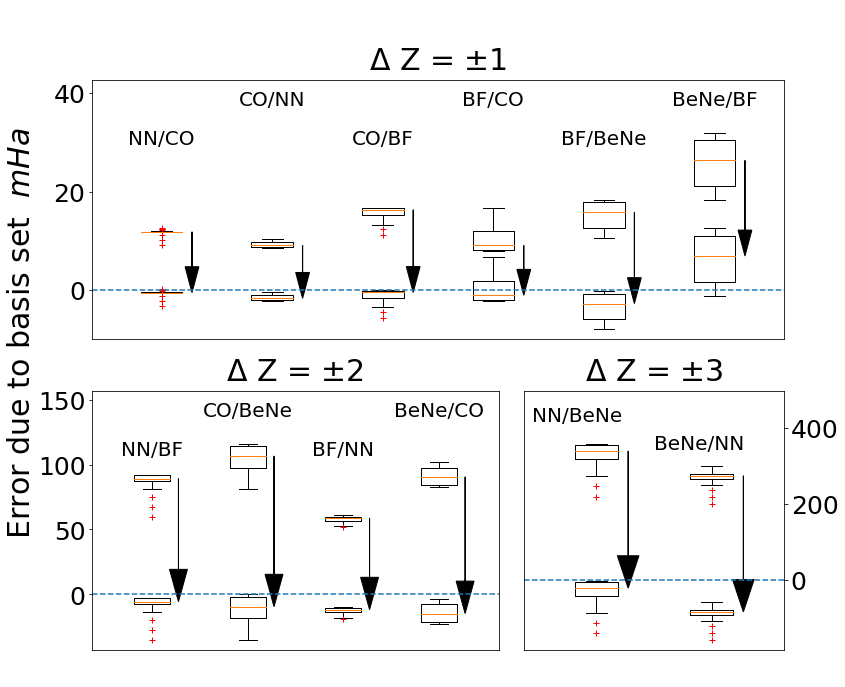

In [46]:
#fig,axs=plt.subplots(3,1,figsize=(15,12))
#default boxplot is median
fig= plt.figure(figsize=(12,12),frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_ylabel(" Error due to basis set  $mHa$",fontsize=30,labelpad=55)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_frame_on(False)

axs=[]
axs.append(fig.add_axes([.1,.5,.8,.3]))
axs.append(fig.add_axes([.1,.14,.47,.3]))
axs.append(fig.add_axes([.6,.14,.3,.3]))

axs[2].yaxis.tick_right()

k=[0.,0.,0.]
data=[[],[],[]]
texts=[[],[],[]]
positions=[[0],[0],[0]]
for i in range (4):
    for j in range(4):
        if j==i: continue 
        dt=dt_qzvpp.query("alchemy==0 &ref==@molecules[@i] &target==@molecules[@j]")
        data[abs(j-i)-1].append((dt.e_at_ref_bs-dt.e_ccsd)*1000)
        data[abs(j-i)-1].append((dt.e_at_ref_bs-dt.e_ccsd-bsc(molecules[i],molecules[j]))*1000)
        positions[abs(j-i)-1].append(positions[abs(j-i)-1][-1]+.8)
        positions[abs(j-i)-1].append(positions[abs(j-i)-1][-1])
        texts[abs(j-i)-1].append((molecules[i],molecules[j]))

for i in range(3):
    positions[i].pop(0)
    axs[i].boxplot(data[i],sym='r+',positions=positions[i],widths=.3)
    axs[i].set_title('$\Delta$ Z = $\pm {}$'.format(i+1),fontsize=30,pad=10)
    axs[i].axhline(0,ls='--')
    axs[i].tick_params(labelsize=25)
    axs[i].set_xticks([])
    lims=axs[i].get_ylim()
    axs[i].set_ylim(lims[0],(lims[1]-lims[0])*1.2+lims[0])
    #arrows
    for j in range(len(data[i])//2):
        m1=data[i][j*2].median()
        m2=data[i][j*2+1].median()
        if i==0:
            axs[i].arrow(positions[i][2*j]+.22,m1,0.,m2-m1, head_width=.1, head_length=0.12*(lims[1]-lims[0]), fc='k',\
                     length_includes_head=True, ec='k') 
            continue
        axs[i].arrow(positions[i][2*j]+.22,m1,0.,m2-m1, head_width=.15, head_length=0.15*(lims[1]-lims[0]), fc='k',\
                     length_includes_head=True, ec='k')         ##### add arrow style
     
##texts 
    if i==2:continue  
    for j in range(len(texts[i])):
        if j//2==j/2: 
            axs[i].text(positions[i][j*2],(lims[1]-lims[0])*.9+lims[0],r"{}/{}".format(texts[i][j][0],\
                                                        texts[i][j][1]),fontsize=20,horizontalalignment='center')
        else:
            axs[i].text(positions[i][j*2],(lims[1]-lims[0])*1.08+lims[0],r"{}/{}".format(texts[i][j][0],\
                                                        texts[i][j][1]),fontsize=20,horizontalalignment='center')

axs[2].text(positions[2][0]-.45,(lims[1]-lims[0])*1.06+lims[0],r"{}/{}".format(texts[2][0][0],texts[2][0][1]),fontsize=20)
axs[2].text(positions[2][2]-.4,(lims[1]-lims[0])*.93+lims[0],r"{}/{}".format(texts[2][1][0],texts[2][1][1]),fontsize=20)

plt.savefig('boxplot.pdf',bbox_inches='tight')

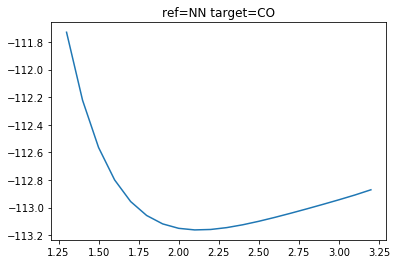

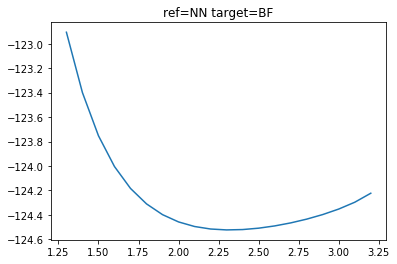

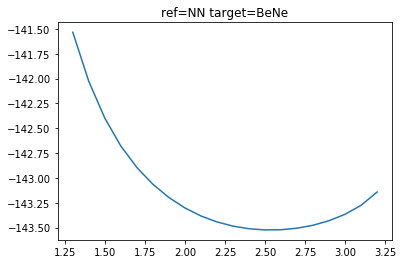

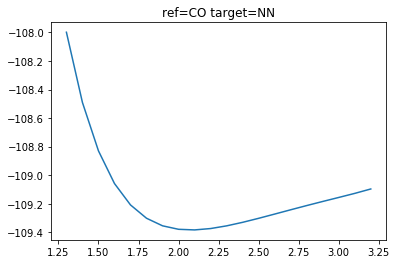

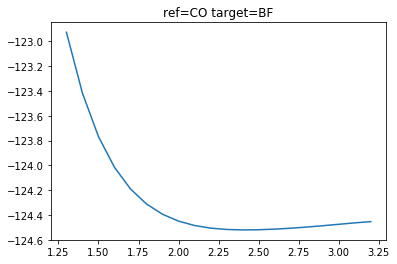

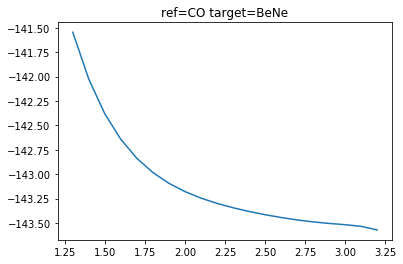

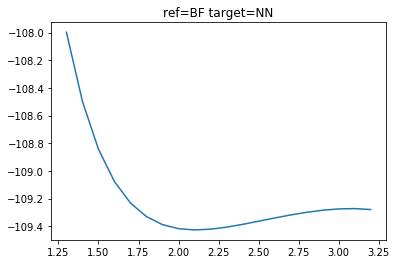

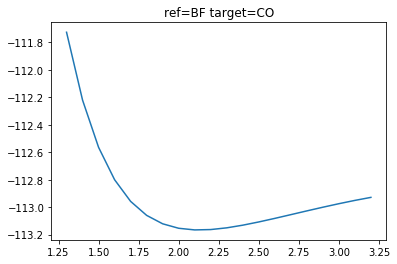

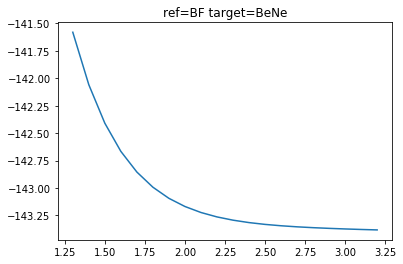

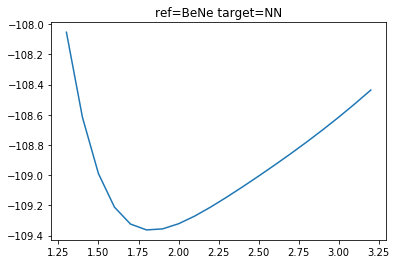

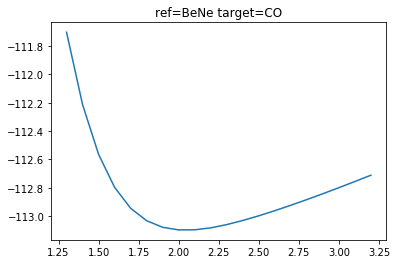

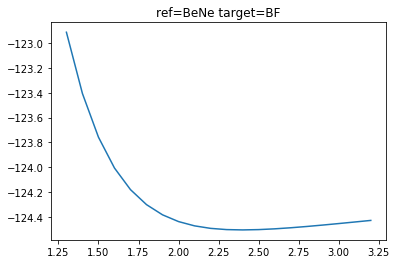

In [14]:
for i in range (4):
    for j in range(4):
        if j==i: continue 
        dt=dt_qzvpp.query("alchemy==2 &ref==@molecules[@i] &target==@molecules[@j]")
        plt.plot(dt.distance,dt.e_alch)
        plt.title("ref={} target={}".format(molecules[i],molecules[j]))
        plt.show()